# Predicting US Domestic Box Office Numbers

In this project we will attempt to predict US Domestic Gross of movies using the movie's budget and first weekend gross as features.


Let's first read in our data and do our necessary imports.

In [23]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

with open("df_bom.pkl", 'rb') as picklefile: 
    df_bom = pickle.load(picklefile)
df_bom.head()

,actors,budget,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,studio,theatrical_run,title,url,widest_release,writers,ww_gross
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",110000000.0,[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, , (executive), Tony Scott, Ale...",6/11/2010,1 hrs. 57 min.,Fox,98 days / 14 weeks,The A-Team,http://www.boxofficemojo.com/movies/?id=ateam.htm,3544.0,[Skip Woods],177238796.0
1,NaN,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,[],10/28/2016,2 hrs. 38 min.,FIP,28 days / 4 weeks,Ae Dil Hai Mushkil,http://www.boxofficemojo.com/movies/?id=aedilh...,302.0,NaN,28360590.0
2,NaN,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,[],4/18/1986,1 hrs. 48 min.,Orion Pictures,None,Absolute Beginners,http://www.boxofficemojo.com/movies/?id=absolu...,4.0,[Don Macpherson],NaN
3,"[Paul Newman, Sally Field]",NaN,[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],11/20/1981,1 hrs. 56 min.,Columbia,133 days / 19 weeks,Absence of Malice,http://www.boxofficemojo.com/movies/?id=absenc...,994.0,NaN,NaN
4,NaN,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,[],7/5/2013,1 hrs. 22 min.,Cinedigm Entertainment,None,Absence,http://www.boxofficemojo.com/movies/?id=absenc...,NaN,NaN,NaN


We will only concentrate on budget, opening weekend gross, and number of theaters in opening release as predictors of domestic gross

In [24]:
df_bom = df_bom[['budget', 'dom_gross', 'opening_release', 'opening_we_gross']]
df_bom.shape

(17634, 4)

In [25]:
df_bom.dropna(inplace = True)
df_bom.shape

(3064, 4)

We are ready to model

## Modeling

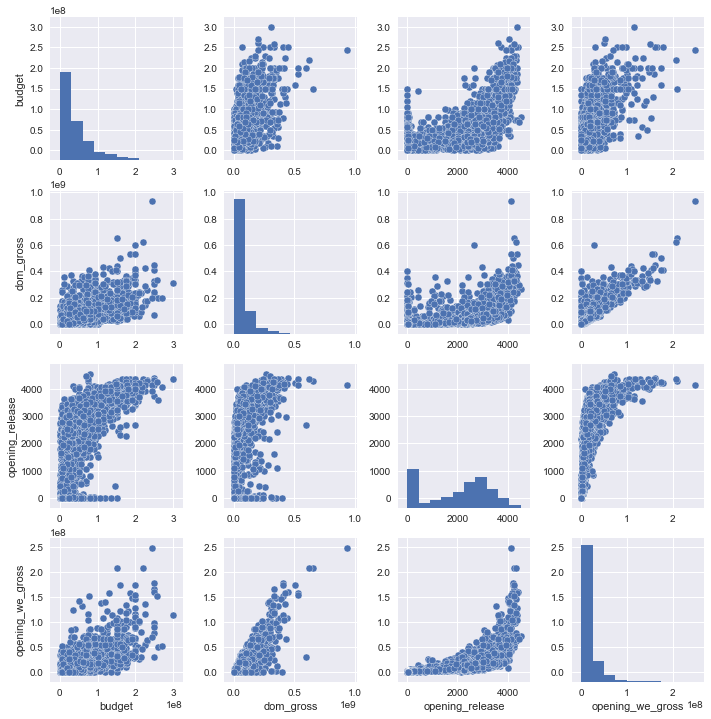

In [26]:
sns.pairplot(df_bom);

This all looks pretty promising

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [28]:
X = df_bom[['budget', 'opening_release', 'opening_we_gross']]
y = df_bom['dom_gross']

In [67]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.81334700688568018

In [75]:
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefs'])
coef_df

,Coefs
budget,0.209530
opening_release,-6568.099889
opening_we_gross,2.868546


This is not a bad score at all, no wonder the industry pays so much attention to the first weekend gross. Let's look at some residual plots.

Text(0.5,0,'Observed Target')

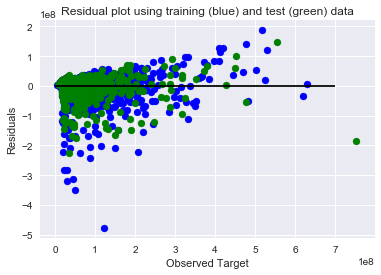

In [81]:
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c='b')
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c='g')
plt.hlines(y=0, xmin=0, xmax=700000000)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('Observed Target')

Some improvement can definetely be made to this regression so residuals are more randomly distributed.